In [1]:
import pandas as pd
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/Abdullahfoysal/pp11-Project-AnalyzeAndVisualize/refs/heads/main/student_data.csv

--2024-12-20 18:33:16--  https://raw.githubusercontent.com/Abdullahfoysal/pp11-Project-AnalyzeAndVisualize/refs/heads/main/student_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133023 (130K) [text/plain]
Saving to: ‘student_data.csv’

student_data.csv    100%[===================>] 129.91K  --.-KB/s    in 0.01s   

2024-12-20 18:33:16 (8.48 MB/s) - ‘student_data.csv’ saved [133023/133023]



In [10]:
# Count the total number of the unique departments

student_data = pd.read_csv("student_data.csv")

unique_departments = student_data["department"].nunique()

print(f"Total number unique departments: {unique_departments}")

Total number unique departments: 5


In [15]:
# Display students who have attended study abroad in the USA

usa_students = student_data[student_data["study_abroad_country"] == "USA"]

print(usa_students)

Empty DataFrame
Columns: [id, first_name, last_name, email, gender, ip_address, cgpa, passing_year, department, attendance, home_district, abroad_study, student_id, graduation_date, study_abroad_country, study_abroad_city, hsc_gpa, ssc_gpa]
Index: []


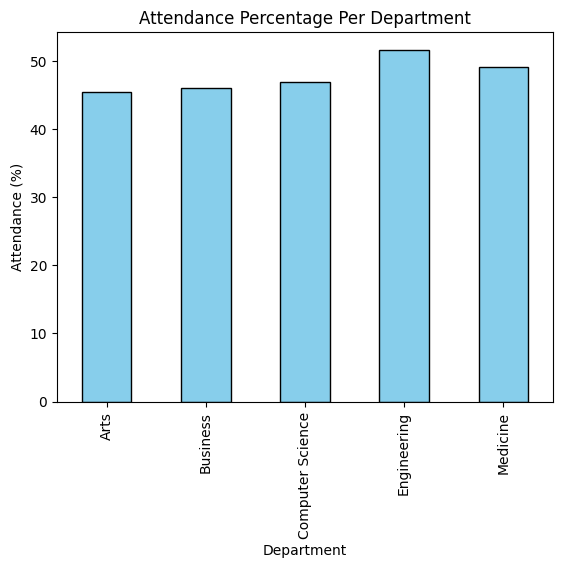

In [24]:
# Plot a bar chart of attendance percentage per department

attendance_per_department = student_data.groupby("department")["attendance"].mean()

attendance_per_department.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Attendance Percentage Per Department")
plt.xlabel("Department")
plt.ylabel("Attendance (%)")

plt.show()